<a href="https://colab.research.google.com/github/DmarGalee/MachineLearning_10/blob/main/Kuis1_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [57]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [58]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [59]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [60]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
# Data Size
df.shape

(48842, 15)

In [49]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [62]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
missing_values = df.isnull().sum()

print(missing_values)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [63]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
missing_values = df.isnull().sum()
print("Missing sebelum imputasi:\n", missing_values[missing_values > 0])

# 2. Imputasi
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["int64", "float64"]:
            # numerik -> median
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
        else:
            # kategorikal -> modus
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)

# 3. Cek lagi setelah imputasi
missing_after = df.isnull().sum()
print("\nMissing setelah imputasi:\n", missing_after[missing_after > 0])



Missing sebelum imputasi:
 workclass         963
occupation        966
native-country    274
dtype: int64

Missing setelah imputasi:
 Series([], dtype: int64)


/tmp/ipython-input-3962933342.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [75]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
kualitatif = 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'

for col in kualitatif:
  print(f"Tipe data untuk {col} : {df[col].dtype}")
  print(f"Nilai untuk {col} : {df[col].unique()}")

df['income'] = df['income'].str.replace('.', '', regex=False)

print(f"\nNilai unik untuk income setelah dibersihkan: {df['income'].unique()}")

cols_to_replace = ['workclass', 'occupation', 'native-country']
for col in cols_to_replace:
    df[col] = df[col].replace('?', 'Others')

print("\nUnique values after replacing '?':")
for col in cols_to_replace:
    print(f"Nilai unik untuk {col}: {df[col].unique()}")

Tipe data untuk workclass : object
Nilai untuk workclass : ['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'others' 'self-emp-inc' 'without-pay' 'never-worked']
Tipe data untuk education : object
Nilai untuk education : ['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']
Tipe data untuk marital-status : object
Nilai untuk marital-status : ['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']
Tipe data untuk occupation : object
Nilai untuk occupation : ['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'others'
 'protective-serv' 'armed-forces' 'priv-house-serv']
Tipe data untuk relationship : object
Nilai untuk relationship : ['not-in-family' 'husband' 'wi

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

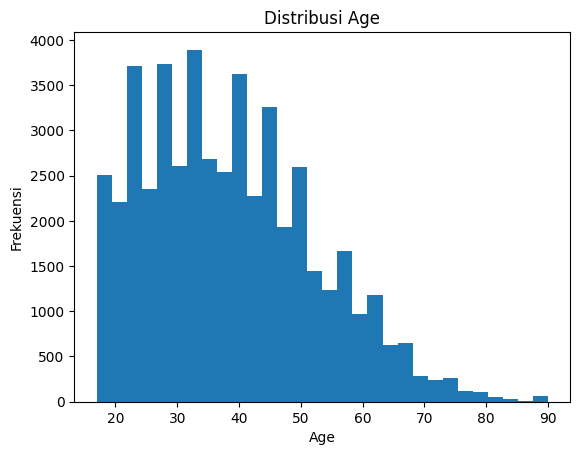

In [76]:
# Jawab 1.1 - Histrogram

plt.hist(df['age'], bins=30)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

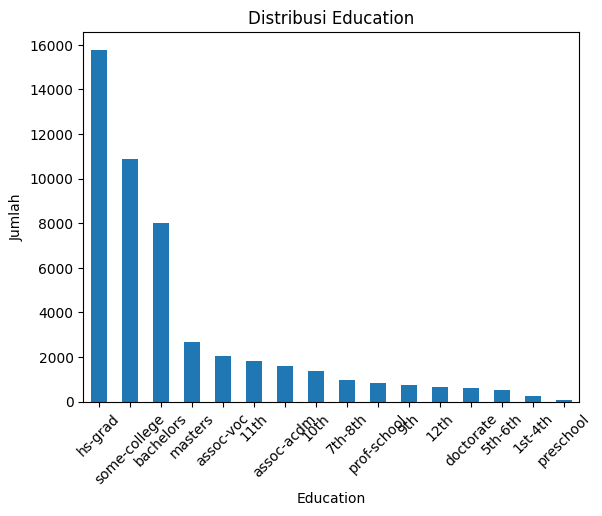

In [77]:
# Jawab 1.2 - Barchart
df['education'].value_counts().plot(
    kind='bar')

plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1188228375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')


Text(0, 0.5, 'Hours per Week')

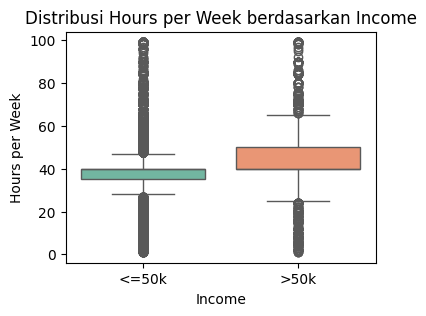

In [79]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')

plt.title('Distribusi Hours per Week berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')


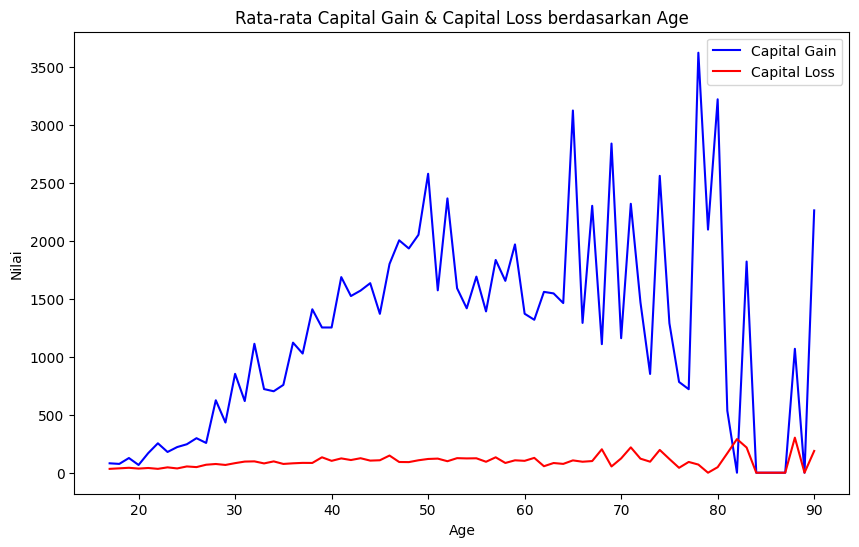

In [74]:
# Jawab 1.4 - Lineplot
age_group = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='capital-gain', data=age_group, label='Capital Gain', color='blue')
sns.lineplot(x='age', y='capital-loss', data=age_group, label='Capital Loss', color='red')

plt.title('Rata-rata Capital Gain & Capital Loss berdasarkan Age')
plt.xlabel('Age')
plt.ylabel('Nilai')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

1.Fenomena apa yang terjadi pada distribusi data 'age'?

Distribusi age cenderung right-skewed (miring ke kanan), artinya mayoritas usia ada di rentang 20-50 tahun, dan semakin sedikit orang di atas usia tersebut.

Ada beberapa nilai ekstrem pada usia tua (60-90), tapi jumlahnya kecil.

Jadi, Usia pekerja paling banyak di usia produktif dan jumlahnya semakin menurun pada usia tua.

2.Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?

Mean/Median Imputation → Median lebih cocok karena distribusi age tidak simetris (skewed). Median akan lebih representatif dibanding mean yang bisa ditarik oleh outlier usia tua.

3.Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

Outlier ada di kedua kategori income, terutama pada pekerja yang bekerja sangat sedikit (<20 jam/minggu atau sangat banyak (>60 jam/minggu).
Kategori <=50K memiliki jumlah outlier terbanyak.

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [83]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le_sex = LabelEncoder()
le_income = LabelEncoder()

# Encode 'sex' and 'income'
df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['income_encoded'] = le_income.fit_transform(df['income'])

# Verify encoding
print("Encoded 'sex' values:", df['sex_encoded'].value_counts())
print("Encoded 'income' values:", df['income_encoded'].value_counts())

Encoded 'sex' values: sex_encoded
1    32650
0    16192
Name: count, dtype: int64
Encoded 'income' values: income_encoded
0    37155
1    11687
Name: count, dtype: int64


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

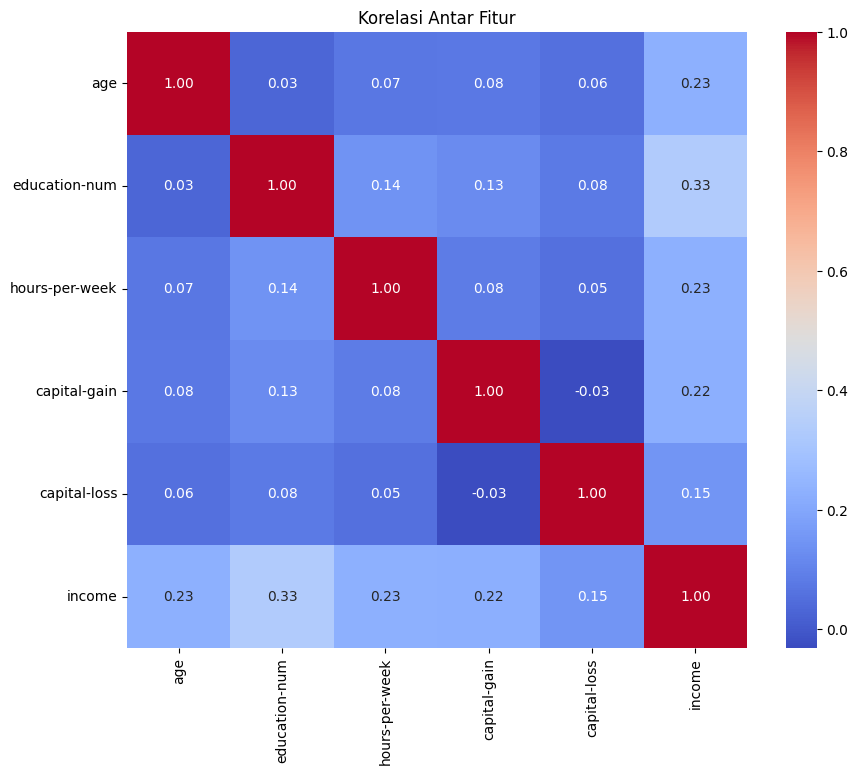

In [82]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
corr_matrix = df_enc[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini


Interpretasi Analisis Korelasi:
1. 'income_encoded' memiliki korelasi positif terkuat dengan 'education-num' (~0,3), yang menunjukkan bahwa tingkat pendidikan yang lebih tinggi berkaitan dengan pendapatan yang lebih tinggi.
2. 'capital-gain' juga menunjukkan korelasi positif sedang dengan 'income_encoded' (~0,2), yang menunjukkan bahwa capital gain berkontribusi pada pendapatan yang lebih tinggi.
3. 'age' dan 'hours-per-week' memiliki korelasi positif yang lebih lemah dengan 'income_encoded', yang menyiratkan usia yang lebih tua dan jam kerja yang lebih banyak agak berkaitan dengan pendapatan yang lebih tinggi.
4. 'capital-loss' memiliki korelasi yang sangat lemah dengan 'income_encoded', yang menunjukkan dampak minimal.
5. Di antara fitur-fitur tersebut, 'education-num' dan 'hours-per-week' memiliki korelasi positif sedang (~0,15), yang menunjukkan bahwa pendidikan yang lebih tinggi dapat menyebabkan jam kerja yang lebih panjang.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [84]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


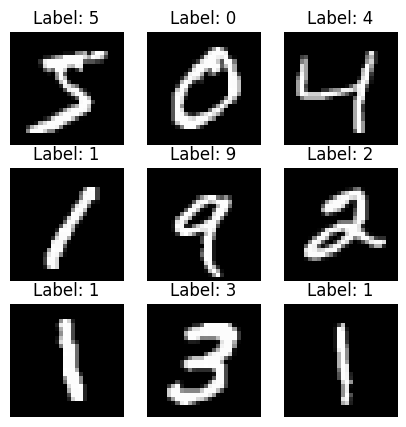

In [85]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape hasil upsampling: (10000, 32, 32)


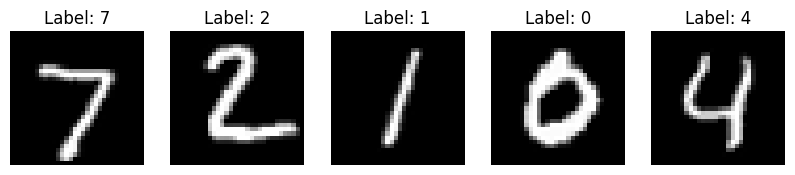

In [90]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import cv2

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

for i in range(len(X_test)):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape hasil upsampling:", X_test_upsampled.shape)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Shape setelah upsampling: (10000, 32, 32)
Min pixel value: 0.0
Max pixel value: 1.0


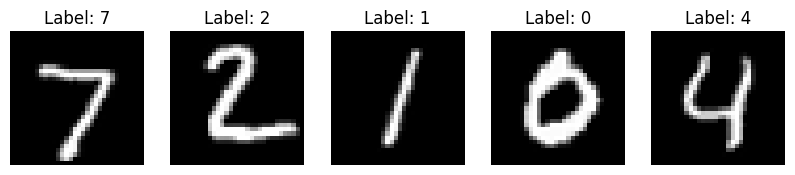

In [110]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

for i in range(len(X_test)):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape setelah upsampling:", X_test_upsampled.shape)

X_test_normalized = X_test_upsampled.astype("float32") / 255.0

print("Min pixel value:", X_test_normalized.min())
print("Max pixel value:", X_test_normalized.max())

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [114]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import numpy as np

X_test_flattened = np.zeros((X_test_normalized.shape[0], 32 * 32))


for i in range(X_test_normalized.shape[0]):
    X_test_flattened[i] = X_test_normalized[i].flatten()


print("Flattened test shape:", X_test_flattened.shape)

print("Min pixel value in flattened array:", X_test_flattened.min())
print("Max pixel value in flattened array:", X_test_flattened.max())
print("Array flatten (10 nilai pertama):")
print(X_test_flat[0][:10])

Flattened test shape: (10000, 1024)
Min pixel value in flattened array: 0.0
Max pixel value in flattened array: 1.0
Array flatten (10 nilai pertama):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
